In [92]:
"""
Author(s): Steven van den Broek
Created: 2019-04-29
Edited: 2019-04-30
"""

'\nAuthor(s): Steven van den Broek\nCreated: 2019-04-29\nEdited: 2019-04-30\n'

In [93]:
import numpy as np
import pandas as pd

from bokeh.plotting import figure, show, output_file
fname = 'datasets/GephiMatrix_author_similarity.csv'
f = open(fname, 'r')

# Get author names
line1 = f.readline()
names = line1[1:].split(';');

In [94]:
seen = {}
dupes = []

for index, name in enumerate(names):
    if name not in seen:
        seen[name] = 1
    else:
        if seen[name] == 1:
            dupes.append((index, name))
        seen[name] += 1

# add 1, 2 etc after the name
for pair in dupes:
    index = pair[0]
    name = pair[1]
    for i in range(seen[name]):
        names[index] = name + str((i+1))
        #print(names[index])

In [95]:
# Read csv
df = pd.read_csv(f, names=names, sep=';')

# Fix it
df = df.reset_index(level=1)
names.append("delete")
df.columns = names
del df["delete"]
df.set_index([df.columns], inplace=True)

# Get names again for later use
names = df.columns.tolist()
df.head()



,Jim_Thomas,Eleftherios_Koutsofios,Lawrence_A._Rowe,Jonathan_I._Helfman,Mary_Brewster,Min_Chen,Christopher_G._Healey,Mac_Holden,M._Gray,Jason_Stewart,...,Allan_Kuchinsky,Ben_Shneiderman,Marc_Alexa,E._Petajan,C._Levit,T._Raita,Chris_Greenhalgh,Michael_L._Dertouzos,Staffan_BjÃ¶rk2,Ken_Pier
Jim_Thomas,1.000000,0.097384,0.125630,0.109691,0.275405,0.195006,0.196239,0.317986,0.407599,0.0,...,0.158035,0.238107,0.230967,0.117254,0.112948,0.608428,0.050252,0.349612,0.156353,0.000000
Eleftherios_Koutsofios,0.097384,1.000000,0.223607,0.144620,0.281718,0.235008,0.383180,0.365148,0.132508,0.0,...,0.343792,0.243184,0.052705,0.298142,0.264931,0.116445,0.000000,0.181084,0.222246,0.298142
Lawrence_A._Rowe,0.125630,0.223607,1.000000,0.242536,0.094491,0.181902,0.123579,0.255155,0.027778,0.0,...,0.131036,0.302167,0.058926,0.291667,0.392031,0.032547,0.000000,0.193255,0.016205,0.000000
Jonathan_I._Helfman,0.109691,0.144620,0.242536,1.000000,0.229175,0.294118,0.173840,0.049507,0.053897,0.0,...,0.050849,0.199626,0.085749,0.323381,0.025355,0.063151,0.485071,0.160701,0.424474,0.000000
Mary_Brewster,0.275405,0.281718,0.094491,0.229175,1.000000,0.297927,0.336302,0.115728,0.356966,0.0,...,0.237729,0.326510,0.222718,0.314970,0.079026,0.295241,0.000000,0.354783,0.220498,0.000000


In [96]:
# Get 150*150 sub matrix since otherwise the plot is very slow..
df = df.head(150)[names[0:150]]
names = df.columns.tolist()


#convert similarity into unsimilarity (1.0 - similarity)
for name in names:
    df[name] = 1 - df[name]
df.head()

mins = {}
for index, row in df.iterrows():
    minimum = row[0]
    minimum_index = 0
    for i in range(row.size):
        if ((row[i] < minimum) and (index != i)):
            minimum = row[i]
            minimum_index = i
    mins[index] = [minimum, minimum_index]
mins

{'Jim_Thomas': [0.0, 0],
 'Eleftherios_Koutsofios': [0.0, 1],
 'Lawrence_A._Rowe': [0.0, 2],
 'Jonathan_I._Helfman': [0.0, 3],
 'Mary_Brewster': [0.0, 4],
 'Min_Chen': [0.0, 5],
 'Christopher_G._Healey': [0.0, 6],
 'Mac_Holden': [0.0, 7],
 'M._Gray': [0.0, 8],
 'Jason_Stewart': [0.0, 9],
 'Volker_Vogelmann': [0.0, 10],
 'Benjamin_B._Bederson': [0.0, 11],
 'Maureen_Tingley': [0.0, 12],
 'C._K._Yung': [0.0, 13],
 'S._Joy_Mountford': [0.0, 14],
 'L._D._Bergman': [0.0, 15],
 'Rich_Gossweiler': [0.0, 16],
 'M._Maruyama': [0.0, 17],
 'David_P._Helmbold': [0.0, 18],
 'C._Dunmire': [0.0, 19],
 'C._C._Gomberg': [0.0, 20],
 'Allison_Woodruff': [0.0, 21],
 'Karlis_Kaugars': [0.0, 22],
 'Jeffrey_Brainerd': [0.0, 23],
 'Claudia_Schmid': [0.0, 24],
 'Ken_Perrine': [0.0, 25],
 'Ishantha_Lokuge': [0.0, 26],
 'M._Weiser': [0.0, 27],
 'Kevin_Teixeira': [0.0, 28],
 'FranÃ§ois_Robillard': [0.0, 29],
 'Monika_Gorkani': [0.0, 30],
 'C._Shaw': [0.0, 31],
 'Issei_Fujishiro': [0.0, 32],
 'J._J._Thomas': [0.0, 

In [97]:
flatten = lambda l: [item for sublist in l for item in sublist]
values = flatten(df.values.tolist())

In [98]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Heatmap(z=df.values.tolist(), x=names, y=names, colorscale='Viridis')]
fig = go.Figure(data=data, layout=go.Layout(width=800, height=800));
pn.extension('plotly')
pane = pn.Row(fig)
pane.servable()

Row
    [0] Plotly(Figure)

In [113]:
#This is just the method online: https://gmarti.gitlab.io/ml/2017/09/07/how-to-sort-distance-matrix.html
#We have to clean data and modified the method

import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn import datasets
from fastcluster import linkage

import matplotlib.pyplot as plt
%matplotlib inline

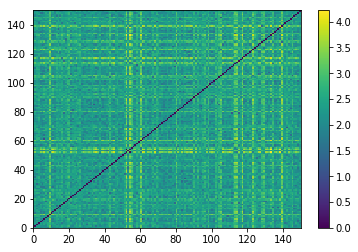

array([[0.        , 2.44681613, 2.3581051 , ..., 2.17015777, 2.12871449,
        2.38011514],
       [2.44681613, 0.        , 2.22169086, ..., 1.89961865, 2.28988654,
        2.18733911],
       [2.3581051 , 2.22169086, 0.        , ..., 2.30982198, 2.45427278,
        2.1705028 ],
       ...,
       [2.17015777, 1.89961865, 2.30982198, ..., 0.        , 2.47194475,
        2.46204748],
       [2.12871449, 2.28988654, 2.45427278, ..., 2.47194475, 0.        ,
        2.23279896],
       [2.38011514, 2.18733911, 2.1705028 , ..., 2.46204748, 2.23279896,
        0.        ]])

In [118]:
dist_mat = squareform(pdist(df))

N = len(df)
plt.pcolormesh(dist_mat)
plt.colorbar()
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

dist_mat

In [120]:
def seriation(Z,N,cur_index):
    '''
        input:
            - Z is a hierarchical tree (dendrogram)
            - N is the number of points given to the clustering process
            - cur_index is the position in the tree for the recursive traversal
        output:
            - order implied by the hierarchical tree Z
            
        seriation computes the order implied by a hierarchical tree (dendrogram)
    '''
    if cur_index < N:
        return [cur_index]
    else:
        left = int(Z[cur_index-N,0])
        right = int(Z[cur_index-N,1])
        return (seriation(Z,N,left) + seriation(Z,N,right))
    
def compute_serial_matrix(dist_mat,method="ward"):
    '''
        input:
            - dist_mat is a distance matrix
            - method = ["ward","single","average","complete"]
        output:
            - seriated_dist is the input dist_mat,
              but with re-ordered rows and columns
              according to the seriation, i.e. the
              order implied by the hierarchical tree
            - res_order is the order implied by
              the hierarhical tree
            - res_linkage is the hierarhical tree (dendrogram)
        
        compute_serial_matrix transforms a distance matrix into 
        a sorted distance matrix according to the order implied 
        by the hierarchical tree (dendrogram)
    '''
    N = len(dist_mat)
    flat_dist_mat = squareform(dist_mat)
    res_linkage = linkage(flat_dist_mat, method=method,preserve_input=True)
    res_order = seriation(res_linkage, N, N + N-2)
    seriated_dist = np.zeros((N,N))
    a,b = np.triu_indices(N,k=1)
    seriated_dist[a,b] = dist_mat[ [res_order[i] for i in a], [res_order[j] for j in b]]
    seriated_dist[b,a] = seriated_dist[a,b]
    
    return seriated_dist, res_order, res_linkage

Method:	 ward


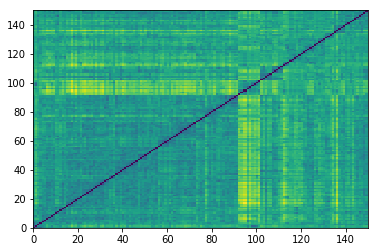

Method:	 single


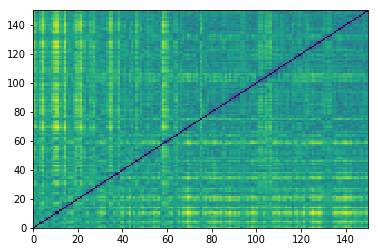

Method:	 average


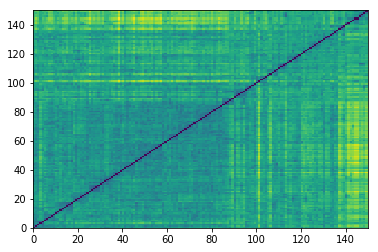

Method:	 complete


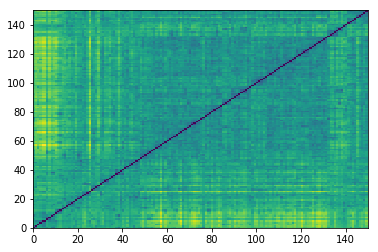

In [121]:
methods = ["ward","single","average","complete"]
for method in methods:
    print("Method:\t",method)
    
    ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(dist_mat,method)
    
    plt.pcolormesh(ordered_dist_mat)
    plt.xlim([0,N])
    plt.ylim([0,N])
    plt.show()